In [1]:
from qiskit import __version__
print(__version__)

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, array_to_latex
from qiskit.result import marginal_distribution
from qiskit.circuit.library import UGate
from numpy import pi, random

1.4.2


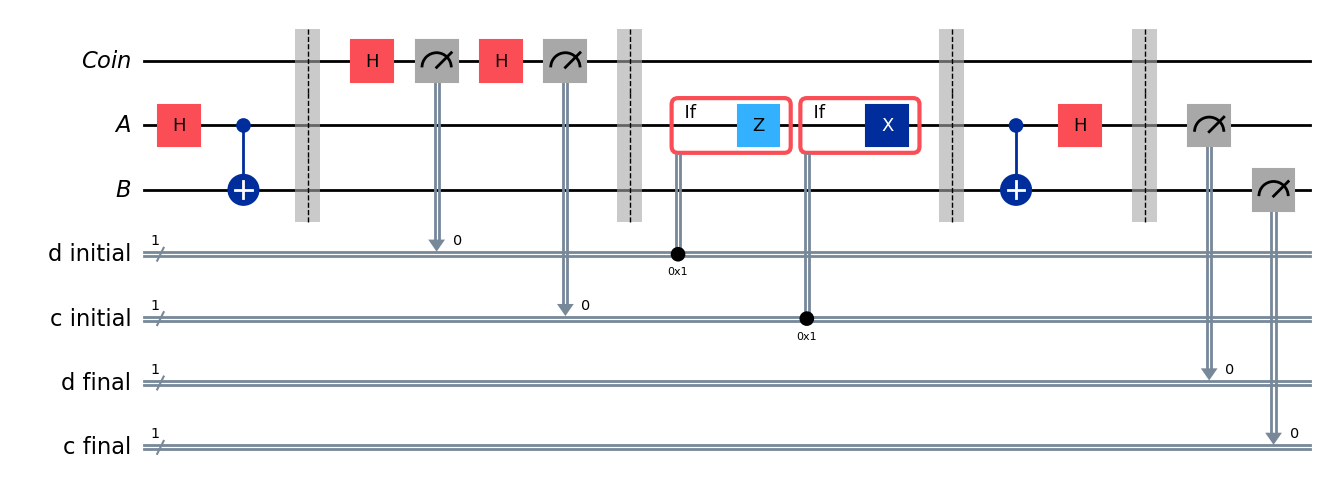

In [4]:
d_i = ClassicalRegister(1, "d initial")
c_i = ClassicalRegister(1, "c initial")

d_f = ClassicalRegister(1, "d final")
c_f = ClassicalRegister(1, "c final")

rbg = QuantumRegister(1, "Coin") ## random bit generator

ebit0 = QuantumRegister(1, "A")
ebit1 = QuantumRegister(1, "B")

protocol = QuantumCircuit(d_i, c_i, rbg, ebit0, ebit1, d_f, c_f)

# Initialize the ebit
protocol.h(ebit0)
protocol.cx(ebit0, ebit1)
protocol.barrier()

# Use the 'coin' qubit twice to generate Alice's bits c and d.
protocol.h(rbg)
protocol.measure(rbg, d_i)
protocol.h(rbg)
protocol.measure(rbg, c_i)
protocol.barrier()

# Alice's initial operations
with protocol.if_test((d_i, 1)):
    protocol.z(ebit0)
with protocol.if_test((c_i, 1)):
    protocol.x(ebit0)
protocol.barrier()

protocol.cx(ebit0, ebit1)
protocol.h(ebit0)
protocol.barrier()

protocol.measure(ebit0, d_f)
protocol.measure(ebit1, c_f)

display(protocol.draw(output="mpl"))

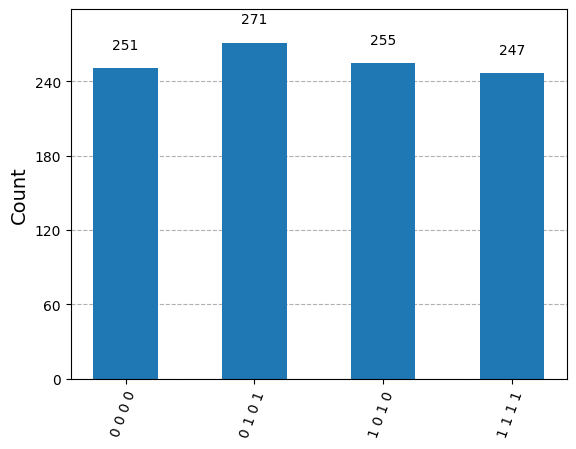

In [5]:
result = AerSimulator().run(protocol).result()
statistics = result.get_counts()
display(plot_histogram(statistics))

## this simulation shows that Alice and Bob always get the same results